## Scan files in given adderess

In [2]:
import os
import csv
import datetime
import time

address = "D:\SBU\Term 8"

with open('out.csv', mode='w' , newline = '') as out:
    writer = csv.writer(out, delimiter = ',',quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    writer.writerow(['name', 'creation', 'format', 'modification', 'folder' ,'size'])
    for path,dirs,files in os.walk(address):
        for f in sorted(files):
            filename = os.path.splitext(f)[0]
            modification = datetime.datetime.fromtimestamp(os.path.getmtime(path + '/' + f))
            format = os.path.splitext(f)[1]
            creation = datetime.datetime.fromtimestamp(os.path.getctime(path + '/' + f))
            folder = path.split('\\')[-1]
            size = os.path.getsize(path + '/' + f)
            writer.writerow(["%s" % filename, "%s" % creation, "%s" % format, "%s" % modification, "%s" % folder, "%s" %  size])

UnicodeEncodeError: 'charmap' codec can't encode characters in position 0-4: character maps to <undefined>

## Import Pandas, Numpy and set rcParams

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import matplotlib
import seaborn as sns
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['font.family'] = 'tahoma'
matplotlib.rcParams['font.weight'] = 'normal'
matplotlib.rcParams['figure.figsize'] = (80,60)





## Read CSV file and create Datagram

In [4]:
df = pd.read_csv('out.csv')
df = df.dropna()

### make new dataframe with conditioning

In [5]:
exceptTextFiles = df[df.format != ".txt"]
exceptTextFiles

,name,creation,format,modification,folder,size
1,EXAM_DBLAB,2022-05-09 16:06:06.967873,.pdf,2021-12-28 18:43:58.664631,exam,226171
2,EXAM_DBLAB_97243081,2022-05-09 16:06:07.079806,.docx,2021-12-29 23:56:50.241467,exam,22050
3,EXAM_DBLAB_97243081,2022-05-09 16:06:07.197753,.pdf,2021-12-29 23:57:26.642171,exam,697852
4,Homework_01,2022-05-09 16:06:07.412600,.pdf,2021-10-27 10:02:20,HW1,160724
5,dblab_hw1_97243081,2022-05-09 16:06:07.301669,.docx,2021-11-01 23:39:07.201535,HW1,15497
...,...,...,...,...,...,...
665,OS_project,2022-05-09 16:08:13.505031,.pptx,2021-12-29 16:32:49.198159,q1,1086035
666,azos,2022-05-09 16:08:08.531090,.docx,2021-12-29 16:59:51.543673,q1,12701
667,danny_detection,2022-05-09 16:08:08.535088,.mp4,2021-12-31 15:33:00.269259,q1,242210066
668,eraeye bachcheha,2022-05-09 16:08:10.742731,.rar,2021-12-26 12:30:37.984761,q1,183245654


## size histogram of all files exept text files

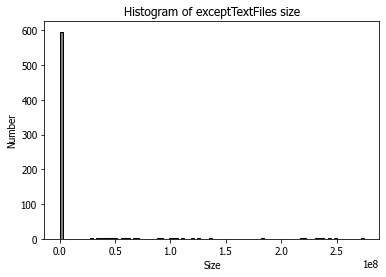

In [6]:
plt.hist(exceptTextFiles['size'], color = 'gray', edgecolor = 'black', bins = int(100))
plt.title('Histogram of exceptTextFiles size')
plt.xlabel('Size') 
plt.ylabel('Number')
plt.savefig('Size histogram of  exceptTextFiles.png')

### Create new Col

In [7]:
df["isChanged"] = df["modification"] != df["creation"]

## size histogram of modificated files

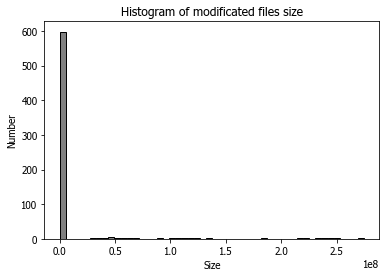

In [8]:

plt.hist(df[df.isChanged == True]['size'], color = 'gray', edgecolor = 'black', bins = int(50))
plt.title('Histogram of modificated files size')
plt.xlabel('Size') 
plt.ylabel('Number')
plt.savefig('Size histogram of modificated files.png')

## format histogram

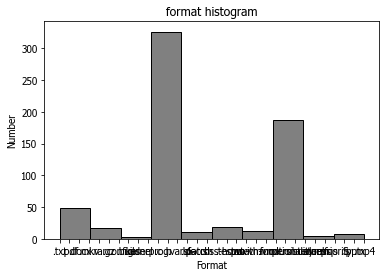

In [9]:
plt.hist(df['format'], color = 'gray', edgecolor = 'black')
plt.title('format histogram')
plt.xlabel('Format'); plt.ylabel('Number');
plt.savefig('format histogram.png')

## size density


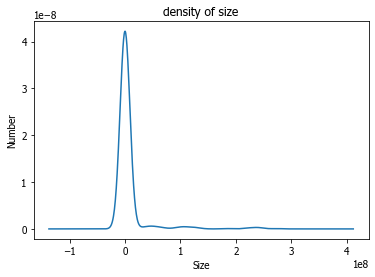

In [10]:
df['size'].plot.density()
plt.title('density of size')
plt.xlabel('Size') 
plt.ylabel('Number')
plt.savefig('density of size.png')

## Scatter of name-format

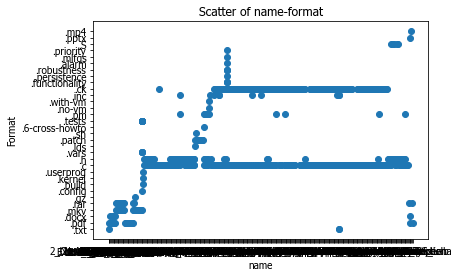

In [11]:
plt.scatter(x = df.name , y = df.format)
plt.title('Scatter of name-format')
plt.xlabel('name') 
plt.ylabel('Format')
plt.savefig('Scatter of name-format.png')